In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [122]:
import joblib

In [123]:
best_model = joblib.load("./modelo_svc/modelo_svc.pkl")

In [124]:
vectorizer = joblib.load("./modelo_svc/vectorizador_tfidf.pkl")

In [125]:
df = pd.read_csv("./dataset/BBC_Noticias.csv")

In [126]:
examples = df["Texto"]

In [127]:
vec = vectorizer.transform(examples).toarray()

In [128]:
probabilities = best_model.predict_proba(vec)

In [129]:
preds = np.where(probabilities[:, 1] > 0.5, 1, 0)
print(preds)

[1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1]


In [130]:
num_unos = np.sum(preds == 1)
num_ceros = np.sum(preds == 0)

print(f"Numero de 1's: {num_unos}")
print(f"Numero de 0's: {num_ceros}")

Numero de 1's: 16
Numero de 0's: 9


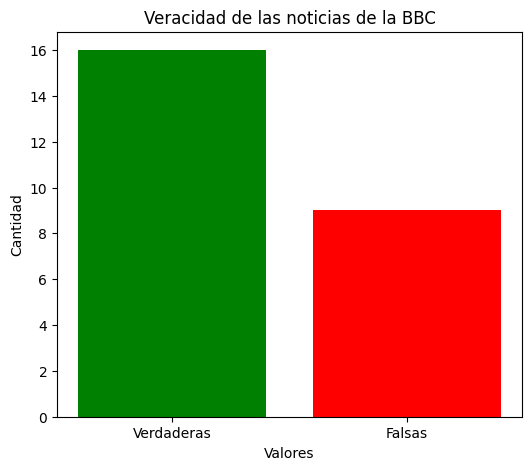

In [131]:
plt.figure(figsize=(6, 5))
plt.bar(['Verdaderas', 'Falsas'], [num_unos, num_ceros], color=['green', 'red'])
plt.title('Veracidad de las noticias de la BBC')
plt.xlabel('Valores')
plt.ylabel('Cantidad')
plt.show()

In [132]:
print(len(df['Titulo'].values))
print(len(probabilities[:, 1]))

25
25


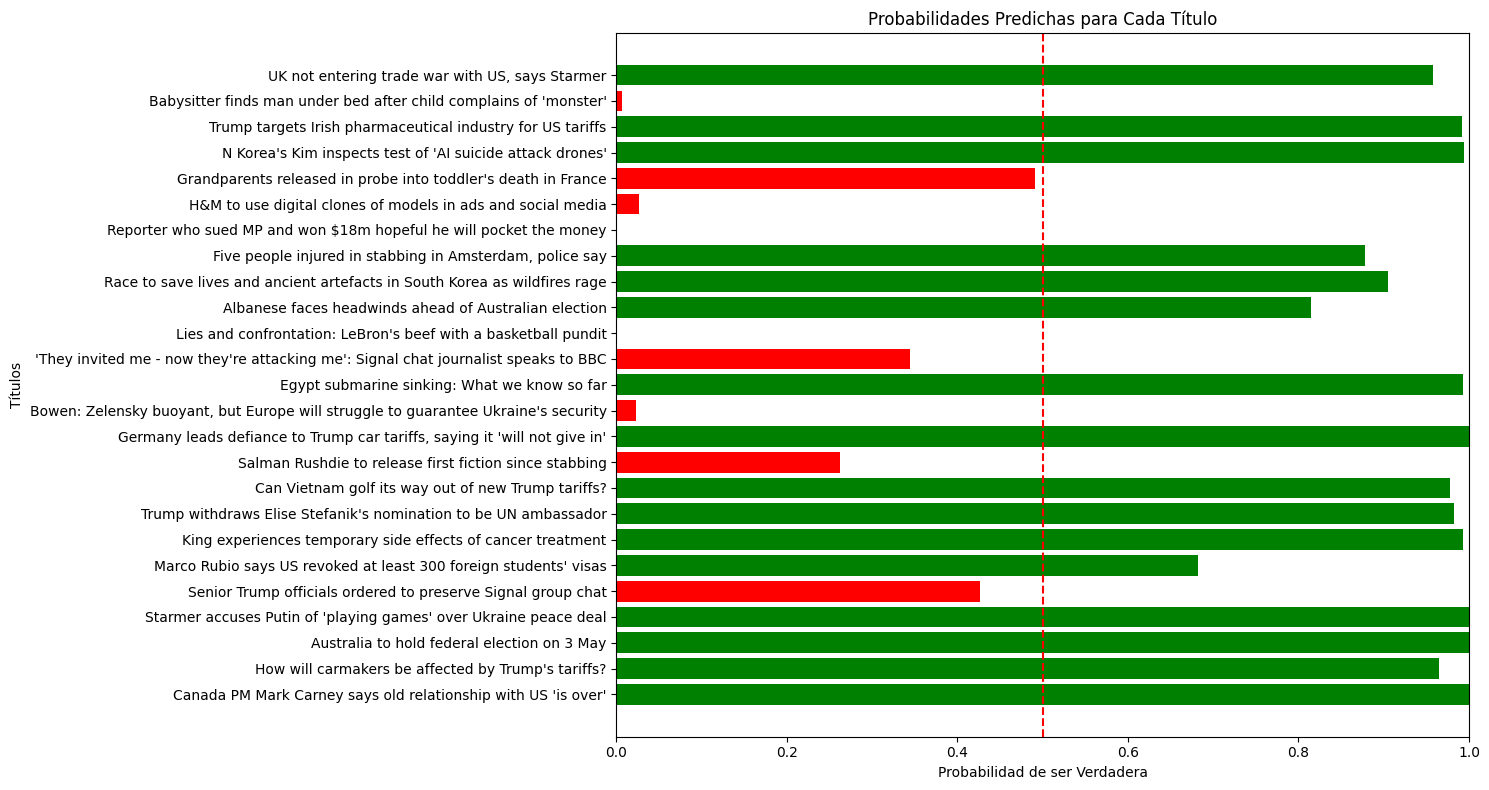

In [120]:
probs_positive_class = probabilities[:, 1]
plt.figure(figsize=(15, 8))
colors = ['red' if prob < 0.5 else 'green' for prob in probs_positive_class]
plt.barh(df['Titulo'].values, probs_positive_class, color=colors)
plt.xlabel('Probabilidad de ser Verdadera')
plt.ylabel('Títulos')
plt.title('Probabilidades Predichas para Cada Título')
plt.axvline(x=0.5, color='red', linestyle='--')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()